In [8]:
import os
import glob
import numpy as np
from astropy.table import Table
from astropy.time import Time
from ccdproc import ImageFileCollection
from tqdm import tqdm

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 20
plt.rcParams["savefig.dpi"] = 500
mpl.rcParams["xtick.labelsize"] = 14  # X축 틱의 글자 크기 설정
mpl.rcParams["ytick.labelsize"] = 14  # Y축 틱의 글자 크기 설정
plt.rc("font", family="serif")

In [10]:
path_image = '/large_data/processed/SDSSJ0228-0901'
path_data = '/large_data/Commission/SDSSJ0228-0901'
path_save = '/large_data/Commission/SDSSJ0228-0901'

In [11]:
# Step 1: 테이블 파일을 astropy.table로 읽기
file_path = f'{path_data}/short_header.txt'  # 파일 경로를 설정합니다.
table = Table.read(file_path, format='ascii')
table['delt'] = table['mjd']-table['mjd'].min()
table = table[np.argsort(table['delt'])]
table[:3]

image,filter,exptime,mjd,jd,date-obs,delt
str55,str4,float64,float64,float64,str23,float64
calib_7DT01_SDSSJ0228-0901_20231017_052003_m650_60.fits,m650,60.0,60234.22226170139,2460234.722261701,2023-10-17T05:20:03.411,0.0
calib_7DT01_SDSSJ0228-0901_20231017_052104_m650_60.fits,m650,60.0,60234.22297313657,2460234.722973137,2023-10-17T05:21:04.879,0.0007114351828931831
calib_7DT01_SDSSJ0228-0901_20231017_052206_m650_60.fits,m650,60.0,60234.22368574074,2460234.723685741,2023-10-17T05:22:06.448,0.0014240393502404913


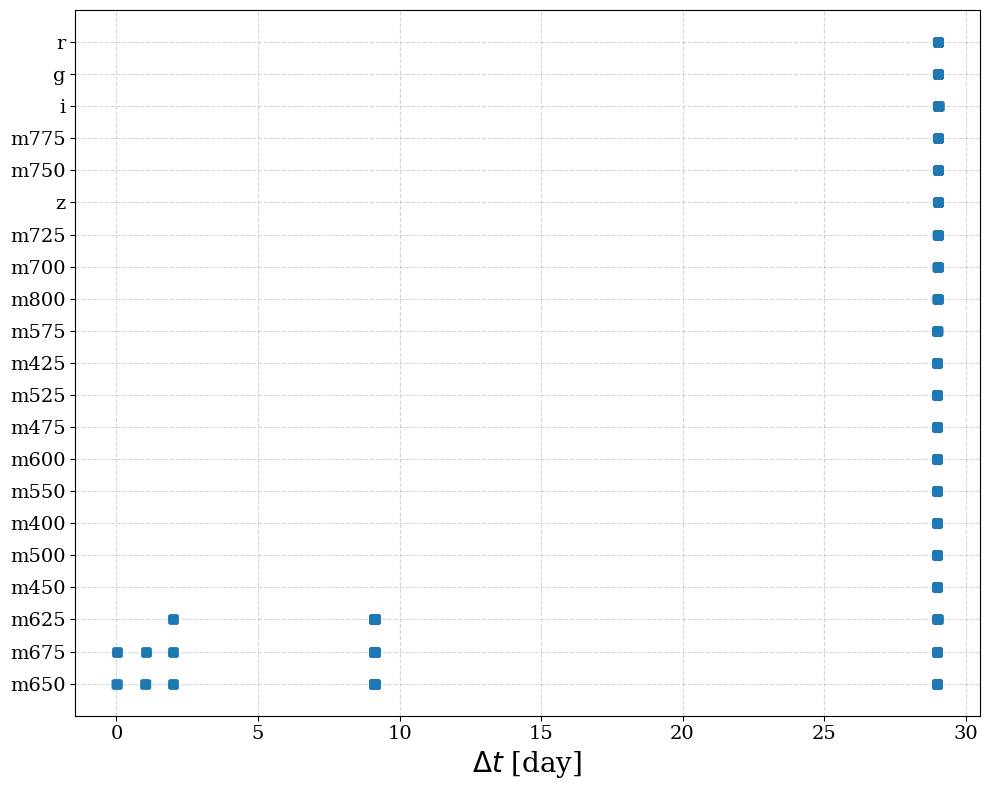

In [12]:
fig = plt.figure(figsize=(10, 8))
plt.plot(table['delt'], table['filter'], 's')
plt.grid('both', ls='--', alpha=0.5)
plt.xlabel(r"$\Delta t$ [day]")
plt.tight_layout()

In [13]:
filters = np.unique(table['filter'].data)
print(f"{len(filters)} filters found")
print(filters)

21 filters found
['g' 'i' 'm400' 'm425' 'm450' 'm475' 'm500' 'm525' 'm550' 'm575' 'm600'
 'm625' 'm650' 'm675' 'm700' 'm725' 'm750' 'm775' 'm800' 'r' 'z']


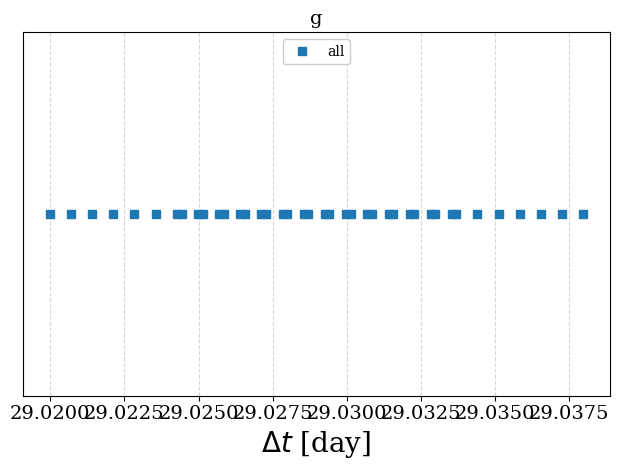

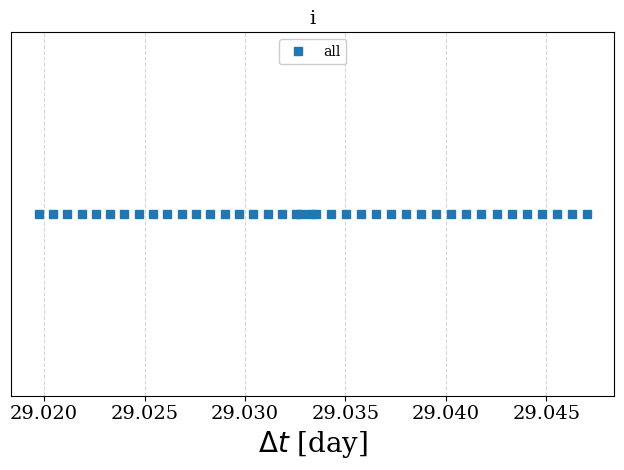

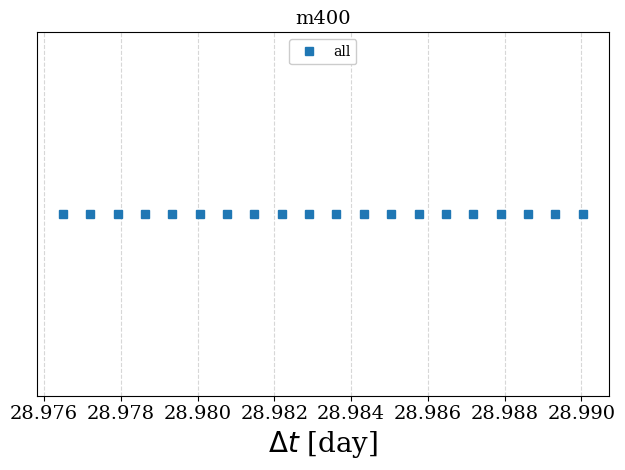

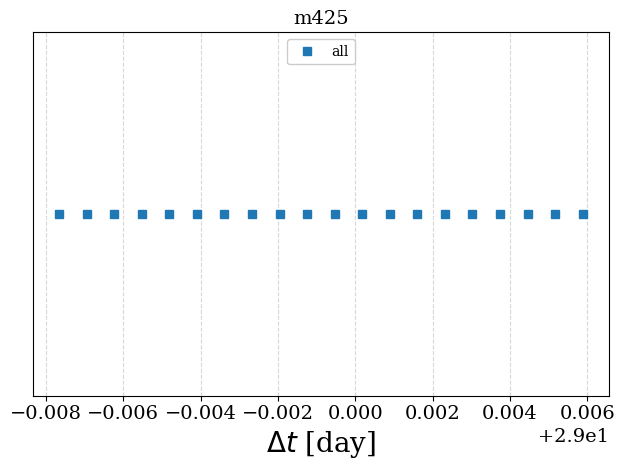

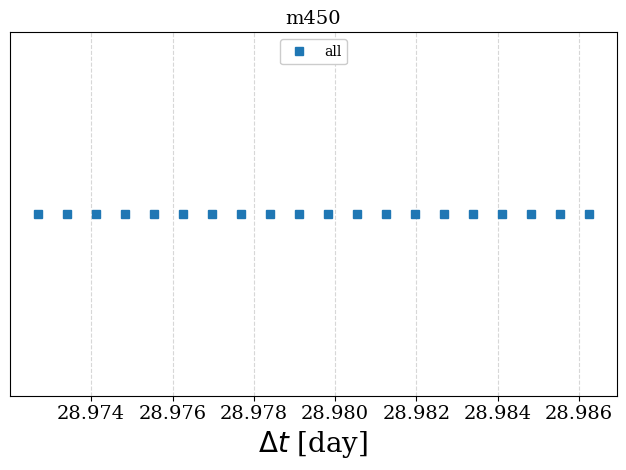

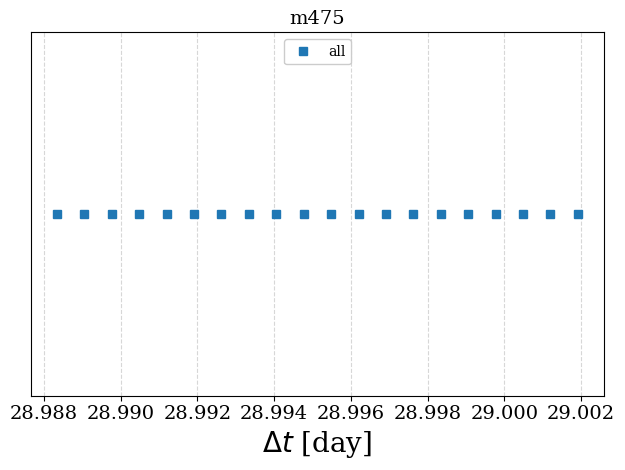

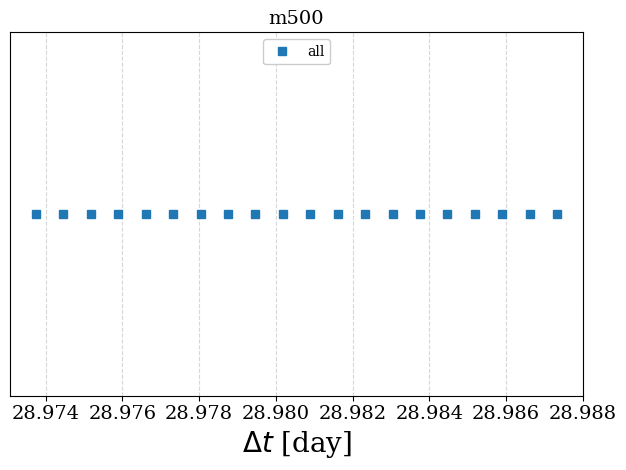

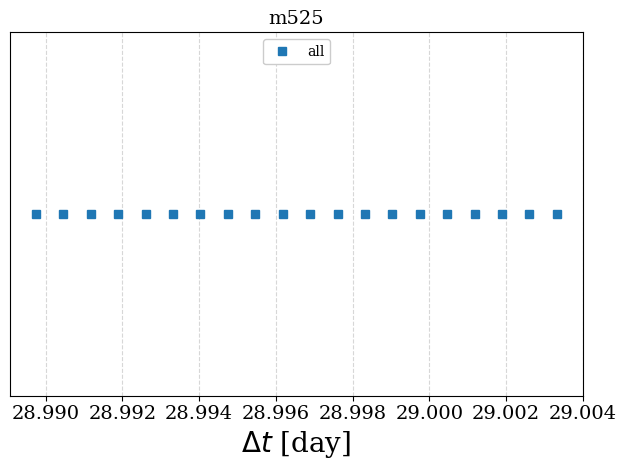

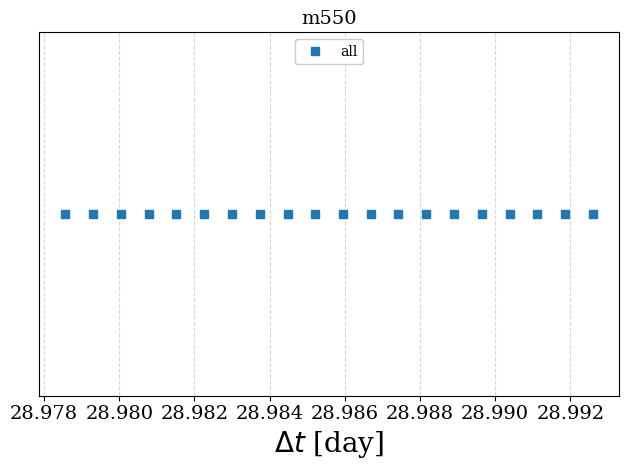

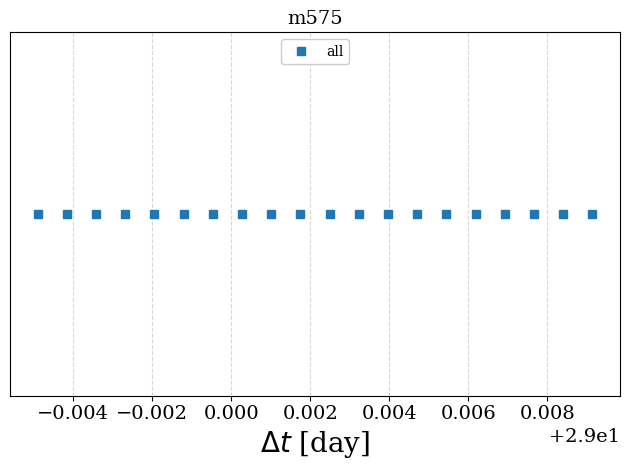

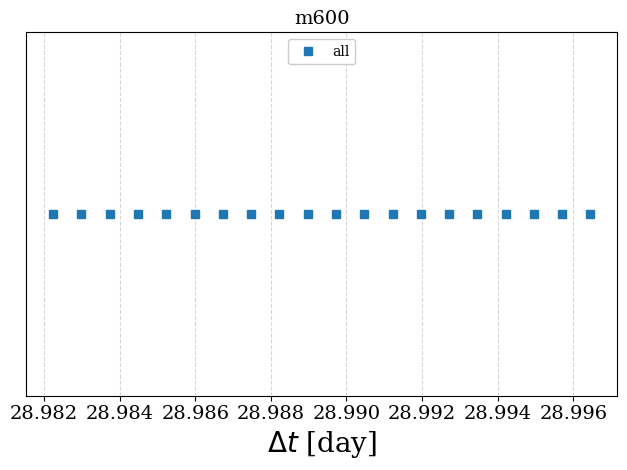

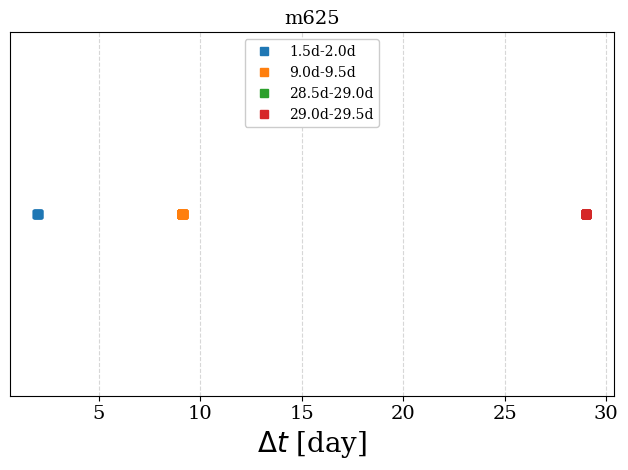

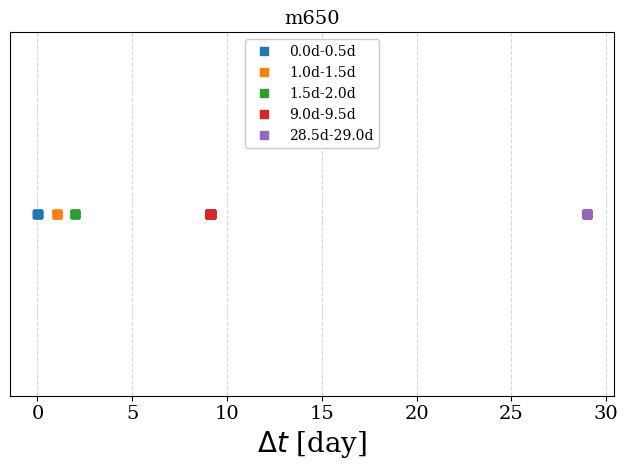

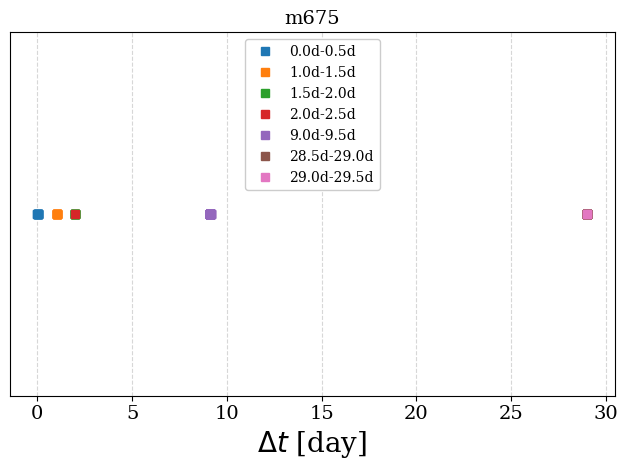

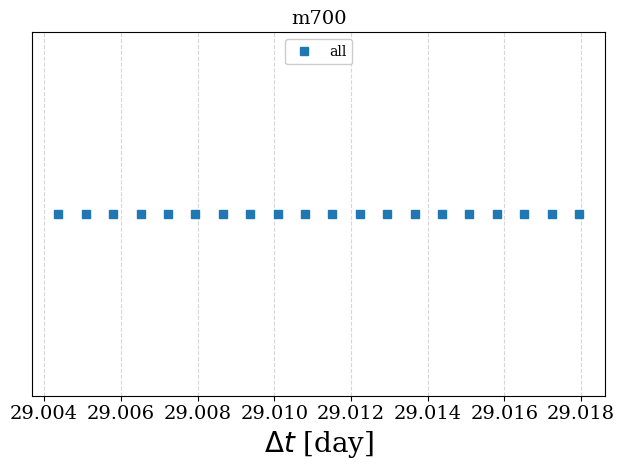

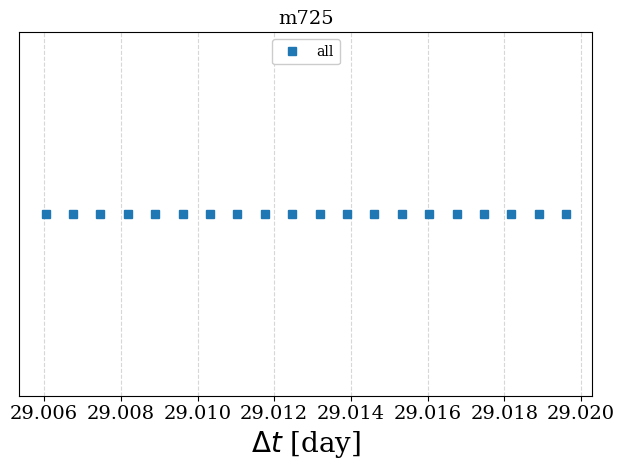

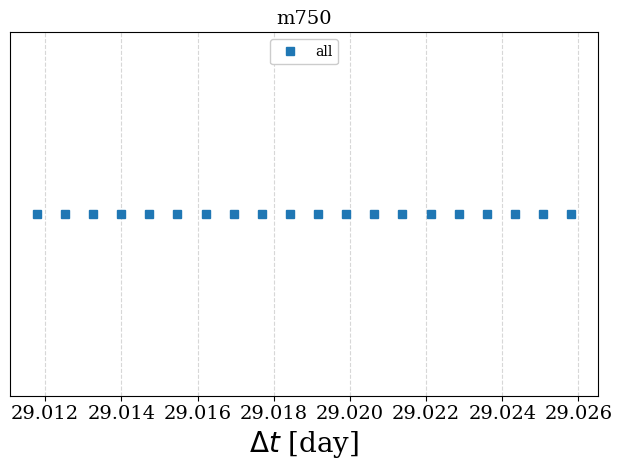

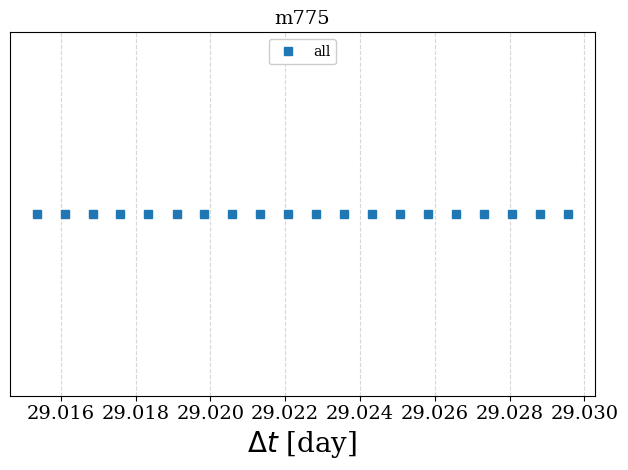

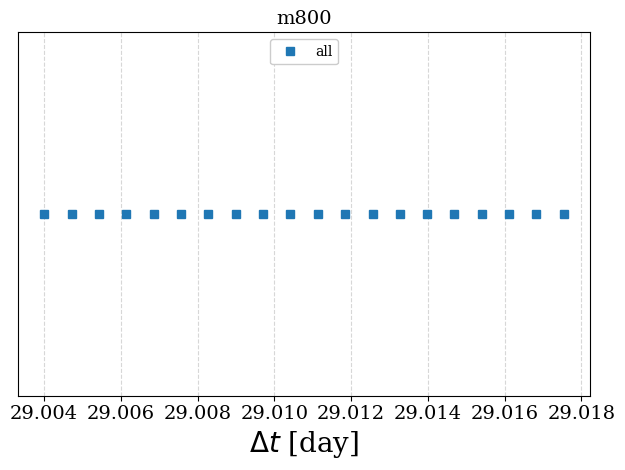

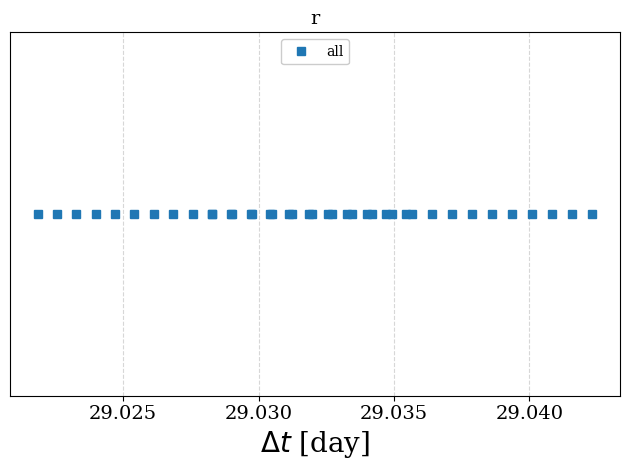

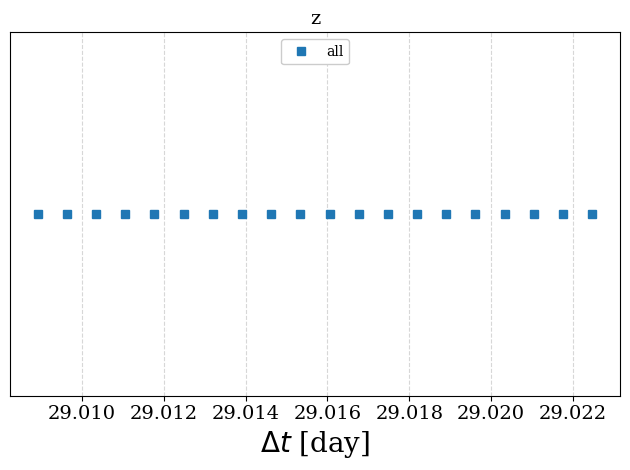

In [14]:
monitor_filters = ['m625', 'm650', 'm675']

step = 0.5
bins = np.arange(0, 31+step, step)

# filte = 'm650'
for filte in filters:
	ftable = table[table['filter'] == filte]
	path_filter = f"{path_data}/{filte}"
	os.makedirs(path_filter, exist_ok=True)
	filter_dict = {}

	if filte in monitor_filters:
		for tbin in bins:
			indx = np.where(
				(ftable['delt'] > tbin) &
				(ftable['delt'] < tbin+step)
			)
			tbl = ftable[indx]

			if len(tbl) > 0:
				label = f'{tbin}d-{tbin+step}d'
				plt.plot(tbl['delt'], [0]*len(tbl), 's', label=label)
				image_list = []
				for inim in tbl['image']:
					part = inim.split('_')
					obs = part[1]
					path_tmp = f"{path_image}/{obs}/{filte}"
					image_list.append(f"{path_tmp}/{inim}")
				filter_dict[label] = image_list
				#	Image List To Stack
				f = open(f"{path_filter}/image_to_stack_{filte}_{label}.txt", "w")
				for inim in image_list:
					f.write(f"{inim}\n")
				f.close()
	else:
		label = f'all'
		plt.plot(ftable['delt'], [0]*len(ftable), 's', label=label)
		image_list = []
		for inim in ftable['image']:
			part = inim.split('_')
			obs = part[1]
			path_tmp = f"{path_image}/{obs}/{filte}"
			image_list.append(f"{path_tmp}/{inim}")
		filter_dict[label] = image_list
		#	Image List To Stack
		f = open(f"{path_filter}/image_to_stack_{filte}_{label}.txt", "w")
		for inim in image_list:
			f.write(f"{inim}\n")
		f.close()
	

	plt.title(f"{filte}")
	plt.yticks([])
	plt.legend(loc='upper center', framealpha=1.0)
	plt.xlabel(r"$\Delta t$ [day]")
	plt.grid('both', ls='--', alpha=0.5)
	plt.tight_layout()
	plt.savefig(f"{path_filter}/epoch_{filte}.png")
	plt.show()